# Coverage plots

Plotting 'enrichment' of CpG (counts matrix essentially - the number of methylRAD-sequences that align to the CpG) within genomic features (exons, introns, UTRs, genes)

I already have CpG motif files for each treatment combo (using `bedtools multicov`), just need to make subset files of CpGs within the genomic features

## 0. load libraries

In [2]:
library(tidyverse)
library(GenomicRanges)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, 

## 1. Load df and manipulate

First, CpG counts matrix is split up by treatment combo - want to read this in, change column names, merge and write new df to use for `bedtools intersect` later to pull out CpGs within exons, introns, UTRs, and genes

In [4]:
read_changeCol <- function(file, trtmt) {
  df <- read.csv(file)
  colnames(df)[6:10] <- paste0(trtmt, 1:5)
  return(df)
}

In [5]:
CC <- read_changeCol('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv', 'CC')
CH <- read_changeCol('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv', 'CH')
HC <- read_changeCol('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv', 'HC')
HH <- read_changeCol('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv', 'HH')

In [10]:
merged_df <- reduce(list(CC, CH, HC, HH), full_join, by = colnames(CC)[1:5])

In [13]:
head(merged_df)[-1]

,chromosome,start,stop,CG_motif,CC1,CC2,CC3,CC4,CC5,CH1,⋯,HC1,HC2,HC3,HC4,HC5,HH1,HH2,HH3,HH4,HH5
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [19]:
write.csv(merged_df[-1], '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/all_CpGmulticov.csv', row.names=FALSE)

Want to pull out subsets of the CpG file - only pull CpGs that are within the genomic feature I'm interested in

# IF SKIPPED ABOVE, RUN THIS CODE:

In [3]:
# run if skipped code above
merged_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/all_CpGmulticov.csv')
head(merged_df)

,chromosome,start,stop,CG_motif,CC1,CC2,CC3,CC4,CC5,CH1,⋯,HC1,HC2,HC3,HC4,HC5,HH1,HH2,HH3,HH4,HH5
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
utr <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exonUTR.bed', sep='\t', header=FALSE)
colnames(utr) <- c('chromosome', 'start', 'stop')

intron <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_intron.bed', sep='\t', header=FALSE)
colnames(intron) <- c('chromosome', 'start', 'stop')

exon <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exon_sorted.bed', sep='\t', header=FALSE)
colnames(exon) <- c('chromosome', 'start', 'stop')

gene <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_gene_sorted.bed', sep='\t', header=FALSE)
colnames(gene) <- c('chromosome', 'start', 'stop')

create a function that takes in two dfs, and pulls out a subset that matches the genomic feature

In [5]:
subset_CpGs <- function(df1, df2) {
    # find the genomic range of the first df (the CpGs)
    df1_gr <- GRanges(seqnames = df1$chromosome, 
                  ranges = IRanges(start = df1$start, end = df1$stop))
    
    # find the genomic range of the second df (genomic feature)
    df2_gr <- GRanges(seqnames = df2$chromosome, 
                  ranges = IRanges(start = df2$start, end = df2$stop))

    # find overlaps
    overlaps <- findOverlaps(df1_gr, df2_gr, type = "within")

    # get the subset of cpgs within the genomic feature
    cpg_overlap <- df1[queryHits(overlaps), ]
    
    return(cpg_overlap)
    }

In [7]:
cpg_exons <- subset_CpGs(merged_df, exon)
cpg_introns <- subset_CpGs(merged_df, intron)
cpg_utrs <- subset_CpGs(merged_df, utr)
cpg_genes <- subset_CpGs(merged_df, gene)

## 2. plot

## 2a. all CpGs within all genomic features

In [8]:
treatments <- c("CC", "HC", "CH", "HH")

# create function to calc avg for each row within treatment
calc_avg <- function(df, feature) {
for (treatment in treatments) {
  df[[paste0(feature, treatment, "_avg")]] <- rowMeans(df[, grep(treatment, colnames(df))], na.rm = TRUE)
}
    return(df)
    }

cpg_exons <- calc_avg(cpg_exons, 'exon')
cpg_introns <- calc_avg(cpg_introns, 'intron')
cpg_utrs <- calc_avg(cpg_utrs, 'utr')
cpg_genes<- calc_avg(cpg_genes, 'gene')

In [9]:
head(cpg_exons)

,chromosome,start,stop,CG_motif,CC1,CC2,CC3,CC4,CC5,CH1,⋯,HC5,HH1,HH2,HH3,HH4,HH5,exonCC_avg,exonHC_avg,exonCH_avg,exonHH_avg
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
351,NC_035780.1,13597,13599,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
672,NC_035780.1,28992,28994,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
673,NC_035780.1,29001,29003,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
674,NC_035780.1,29028,29030,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
695,NC_035780.1,30539,30541,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
696,NC_035780.1,30574,30576,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
expand_features <- function(df, feature) {
  df[, (ncol(df) - 3):ncol(df)] |>
    pivot_longer(cols = everything(),
                 names_to = 'colname',
                 values_to = 'count') |>
    mutate(feature = feature,
           treatment = gsub(paste0(feature, "|_avg"), "", colname, perl = TRUE))
}

In [11]:
exon_long <- expand_features(cpg_exons, 'exon')

intron_long <- expand_features(cpg_introns, 'intron')

utr_long <- expand_features(cpg_utrs, 'utr')

gene_long <- expand_features(cpg_genes, 'gene')

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `treatment = gsub(paste0(feature, "|_avg"), "", colname, perl =
  TRUE)`.
Caused by warning in `gsub()`:
! argument 'pattern' has length > 1 and only the first element will be used”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `treatment = gsub(paste0(feature, "|_avg"), "", colname, perl =
  TRUE)`.
Caused by warning in `gsub()`:
! argument 'pattern' has length > 1 and only the first element will be used”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `treatment = gsub(paste0(feature, "|_avg"), "", colname, perl =
  TRUE)`.
Caused by warning in `gsub()`:
! argument 'pattern' has length > 1 and only the first element will be used”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `treatment = gsub(paste0(feature, "|_avg"), "", colname, perl =
  TRUE)`.
Caused by warning in `gsub()`:
! argument 'pattern' has length > 1 and only the first element will be used”


In [12]:
full_df <- rbind(exon_long, intron_long, utr_long, gene_long)
head(full_df)

colname,count,feature,treatment
<chr>,<dbl>,<chr>,<chr>
exonCC_avg,0,exon,CC
exonHC_avg,0,exon,HC
exonCH_avg,0,exon,CH
exonHH_avg,0,exon,HH
exonCC_avg,0,exon,CC
exonHC_avg,0,exon,HC


okay so kernel crashes everytime I try to run ggplot with that giant df which makes sense lol ... most of the features have zeroes anyways, so going to remove rows with zeroes and see if that helps

In [15]:
filtered_df <- full_df %>%
filter(count != 0) 

In [13]:
#write.csv(full_df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/genomic_feature_tracks/twl_sideQuest/cpg_coverage_counts.csv', row.names=FALSE)

In [3]:
#filtered_Df <read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/genomic_feature_tracks/twl_sideQuest/cpg_coverage_counts.csv')

In [16]:
dim(full_df)
dim(filtered_df)

[1] 78656120        4

[1] 3586719       4

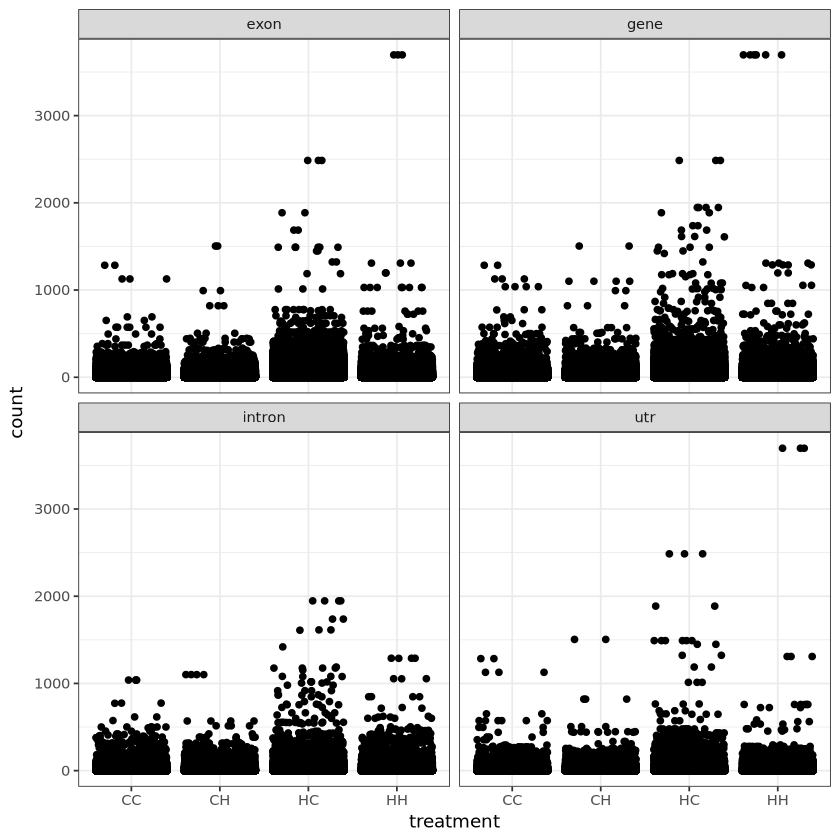

In [17]:
ggplot(filtered_df, aes(x=treatment, y=count)) +
geom_jitter() + 
facet_wrap(~feature) +
theme_bw()

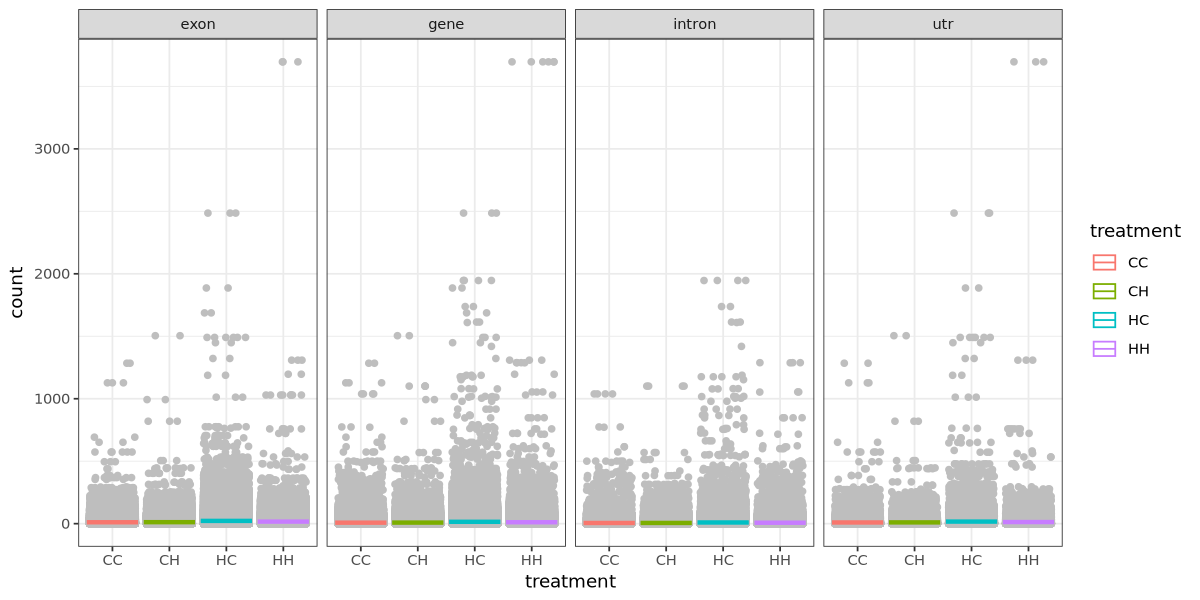

In [21]:
options(repr.plot.width=10, repr.plot.height=5)

plot1 <- ggplot(filtered_df, aes(x=treatment, y=count)) +
geom_jitter(color = 'gray') + 
facet_wrap(~feature, nrow=1) +
stat_summary(aes(color = treatment), fun = "mean", geom = "crossbar") +
guides(col = FALSE) +
theme_bw()

plot1

as a reminder, this is **all** CpGs within **all** genomic features, not just limited to DMGs

Next, I will look at just DMGs

## 2b. CpGs within genomic features within DMGs

I have already made a bed file of the differentially methylated genes in another notebook

In [8]:
dmg.bed <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/proportion_overlap/dmg_gff.bed', sep = '\t', header = FALSE)
colnames(dmg.bed) <- c('chromosome', 'start',  'stop')
head(dmg.bed)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,315522,340261
2,NC_035780.1,444907,453310
3,NC_035780.1,9011563,9043404
4,NC_035780.1,9288063,9301976
5,NC_035780.1,13324137,13332152
6,NC_035780.1,13591534,13596982


slightly altering the `subset_CpGs` function from above to work for DMGs

In [9]:
subset_DMGs <- function(df1, df2) {
    # find the genomic range of the first df (the CpGs)
    df1_gr <- GRanges(seqnames = df1$chromosome, 
                  ranges = IRanges(start = df1$start, end = df1$stop))
    
    # find the genomic range of the second df (genomic feature)
    df2_gr <- GRanges(seqnames = df2$chromosome, 
                  ranges = IRanges(start = df2$start, end = df2$stop))

    # find overlaps
    overlaps <- findOverlaps(df1_gr, df2_gr, type = "within")

    # get the subset of cpgs within the genomic feature
    cpg_overlap <- df1[queryHits(overlaps), ]
    
    return(cpg_overlap)
    }

re-run code before 2. plot heading to re-generate cpg_feature dfs

In [10]:
dmg_exons <- subset_DMGs(cpg_exons, dmg.bed)
dmg_introns <- subset_DMGs(cpg_introns, dmg.bed)
dmg_utrs <- subset_DMGs(cpg_utrs, dmg.bed)
dmg_genes <- subset_DMGs(cpg_genes, dmg.bed)

In [11]:
treatments <- c("CC", "HC", "CH", "HH")

# create function to calc avg for each row within treatment
calc_avg <- function(df, feature) {
for (treatment in treatments) {
  df[[paste0(feature, treatment, "_avg")]] <- rowMeans(df[, grep(treatment, colnames(df))], na.rm = TRUE)
}
    return(df)
    }

dmg_exons <- calc_avg(dmg_exons, 'exon')
dmg_introns <- calc_avg(dmg_introns, 'intron')
dmg_utrs <- calc_avg(dmg_utrs, 'utr')
dmg_genes<- calc_avg(dmg_genes, 'gene')

In [12]:
head(dmg_exons)

,chromosome,start,stop,CG_motif,CC1,CC2,CC3,CC4,CC5,CH1,⋯,HC5,HH1,HH2,HH3,HH4,HH5,exonCC_avg,exonHC_avg,exonCH_avg,exonHH_avg
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
7049,NC_035780.1,315523,315525,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7050,NC_035780.1,315549,315551,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7051,NC_035780.1,315563,315565,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7052,NC_035780.1,315567,315569,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7053,NC_035780.1,315618,315620,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7056,NC_035780.1,315777,315779,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
expand_features <- function(df, feature) {
  df[, (ncol(df) - 3):ncol(df)] |>
    pivot_longer(cols = everything(),
                 names_to = 'colname',
                 values_to = 'count') |>
    mutate(feature = feature,
           treatment = gsub(paste0(feature, "|_avg"), "", colname, perl = TRUE))
}

In [14]:
dmg.exon_long <- expand_features(dmg_exons, 'exon')

dmg.intron_long <- expand_features(dmg_introns, 'intron')

dmg.utr_long <- expand_features(dmg_utrs, 'utr')

dmg.gene_long <- expand_features(dmg_genes, 'gene')

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `treatment = gsub(paste0(feature, "|_avg"), "", colname, perl =
  TRUE)`.
Caused by warning in `gsub()`:
! argument 'pattern' has length > 1 and only the first element will be used”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `treatment = gsub(paste0(feature, "|_avg"), "", colname, perl =
  TRUE)`.
Caused by warning in `gsub()`:
! argument 'pattern' has length > 1 and only the first element will be used”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `treatment = gsub(paste0(feature, "|_avg"), "", colname, perl =
  TRUE)`.
Caused by warning in `gsub()`:
! argument 'pattern' has length > 1 and only the first element will be used”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `treatment = gsub(paste0(feature, "|_avg"), "", colname, perl =
  TRUE)`.
Caused by warning in `gsub()`:
! argument 'pattern' has length > 1 and only the first element will be used”


In [15]:
full_df <- rbind(dmg.exon_long, dmg.intron_long, dmg.utr_long, dmg.gene_long)
head(full_df)

colname,count,feature,treatment
<chr>,<dbl>,<chr>,<chr>
exonCC_avg,0,exon,CC
exonHC_avg,0,exon,HC
exonCH_avg,0,exon,CH
exonHH_avg,0,exon,HH
exonCC_avg,0,exon,CC
exonHC_avg,0,exon,HC


In [20]:
tail(full_df)

colname,count,feature,treatment
<chr>,<dbl>,<chr>,<chr>
geneCH_avg,0,gene,CH
geneHH_avg,0,gene,HH
geneCC_avg,0,gene,CC
geneHC_avg,0,gene,HC
geneCH_avg,0,gene,CH
geneHH_avg,0,gene,HH


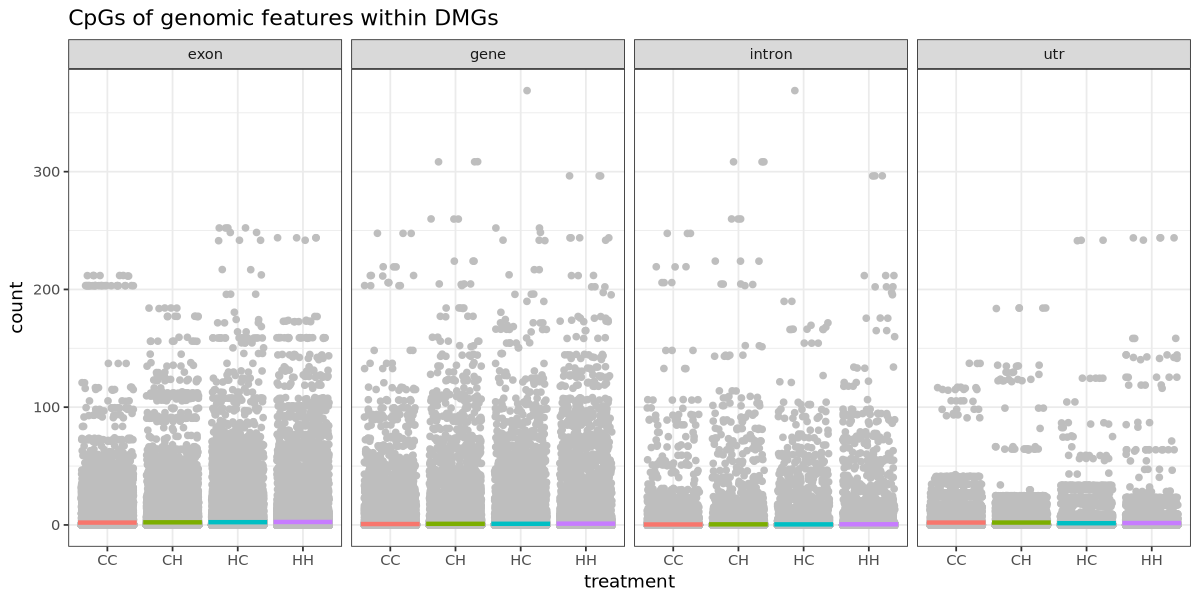

In [23]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot(full_df, aes(x=treatment, y=count)) +
geom_jitter(color = 'gray') + 
facet_wrap(~feature, nrow=1) +
stat_summary(aes(color = treatment), fun = "mean", geom = "crossbar") +
guides(col = 'none') +
labs(title = 'CpGs of genomic features within DMGs') +
theme_bw()


what about filtering out the CpGs with zero methylation counts?

In [26]:
zero_inDMG <- full_df %>%
filter(count != 0) 

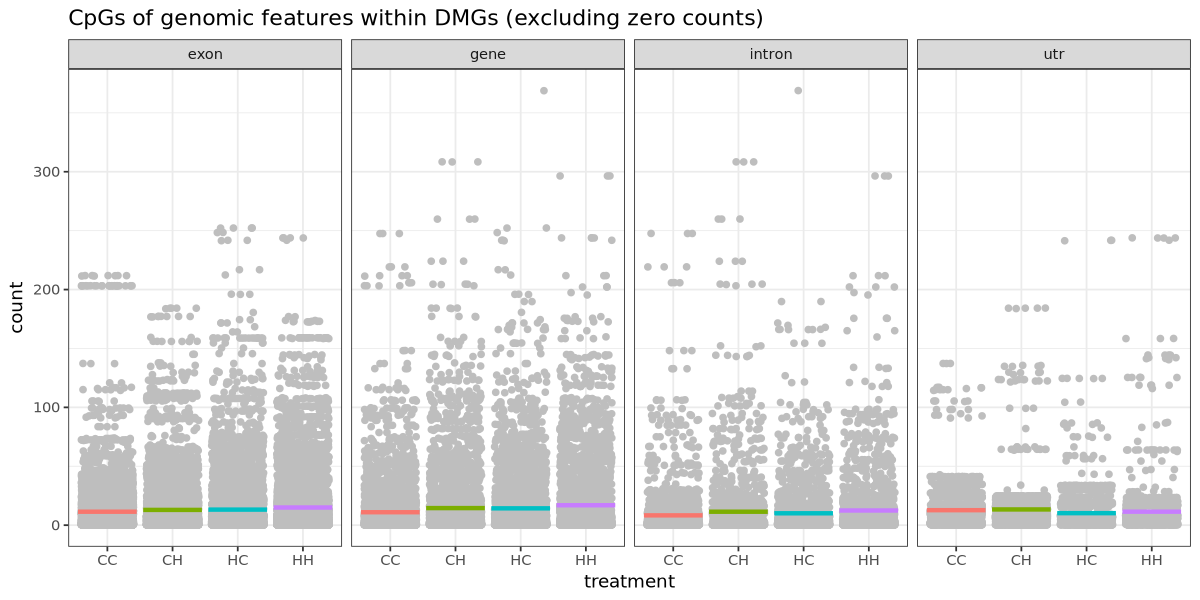

In [28]:
ggplot(zero_inDMG, aes(x=treatment, y=count)) +
geom_jitter(color = 'gray') + 
facet_wrap(~feature, nrow=1) +
stat_summary(aes(color = treatment), fun = "mean", geom = "crossbar") +
guides(col = 'none') +
labs(title = 'CpGs of genomic features within DMGs (excluding zero counts)') +
theme_bw()